In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for train and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directory in batches
Xtrain= train_datagen.flow_from_directory(
    directory='/Users/sukanya/Downloads/dataset_fracture/train',
    target_size=(256, 256),
    batch_size=100,
    class_mode='binary'
)

Xtest = test_datagen.flow_from_directory(
    directory='/Users/sukanya/Downloads/dataset_fracture/val',
    target_size=(256, 256),
    batch_size=100,
    class_mode='binary'
)

# Optionally, if you want to convert class labels to integers
class_indices = Xtrain.class_indices
train_dataset = (Xtrain, class_indices)
test_dataset = (Xtest, class_indices)

Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [6]:
import tensorflow as tf

# Define a function to normalize images
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

# Convert DirectoryIterator objects to tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_generator(
    lambda: Xtrain,
    output_signature=(
        tf.TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

test_dataset = tf.data.Dataset.from_generator(
    lambda: Xtest,
    output_signature=(
        tf.TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

# Apply normalization using the map function
x_train = train_dataset.map(process)
x_test = test_dataset.map(process)

In [7]:
input_shape = (256, 256, 3)

In [8]:
#model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(GaussianNoise(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(GaussianNoise(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(GaussianNoise(0.1))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 gaussian_noise (GaussianNo  (None, 256, 256, 32)      0         
 ise)                                                            
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 average_pooling2d (Average  (None, 64, 64, 64)        0

In [10]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
batch_size = min(100, len(Xtrain))
history = model.fit(Xtrain, epochs=10, batch_size=batch_size, validation_data=Xtest)

Epoch 1/10
89/89 [==============================] - 227s 3s/step - loss: 0.9029 - accuracy: 0.4996 - val_loss: 0.6924 - val_accuracy: 0.6000
Epoch 2/10
89/89 [==============================] - 223s 3s/step - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6916 - val_accuracy: 0.6000
Epoch 3/10
89/89 [==============================] - 228s 3s/step - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6916 - val_accuracy: 0.6000
Epoch 4/10
89/89 [==============================] - 233s 3s/step - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6916 - val_accuracy: 0.6000
Epoch 5/10
89/89 [==============================] - 240s 3s/step - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6910 - val_accuracy: 0.6000
Epoch 6/10
89/89 [==============================] - 232s 3s/step - loss: 0.6933 - accuracy: 0.5001 - val_loss: 0.6910 - val_accuracy: 0.6000
Epoch 7/10
89/89 [==============================] - 227s 3s/step - loss: 0.6937 - accuracy: 0.5039 - val_loss: 0.6928 - val_accuracy: 0.6000
Epoch 8/10
89

In [12]:
y_test = Xtest.classes

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have model predictions and true labels
predictions = model.predict(Xtest)
predicted_labels = (predictions > 0.5).astype(int)
true_labels = y_test

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

6/6 [==============================] - 3s 556ms/step
Accuracy: 0.6
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


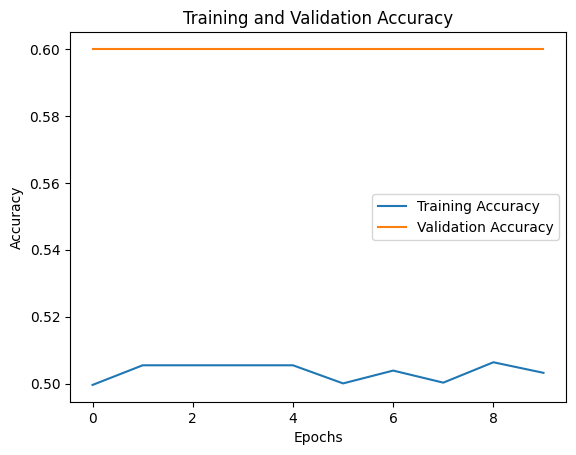

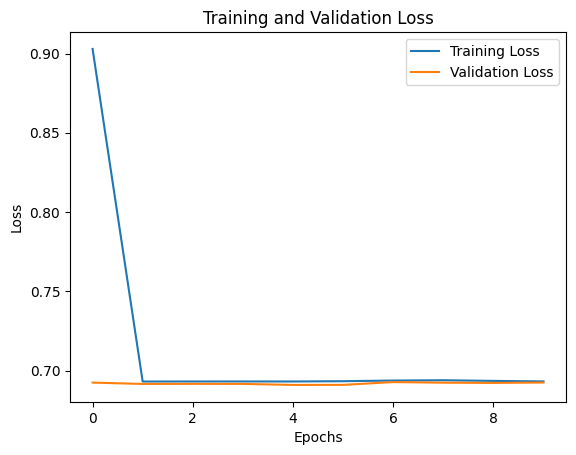

In [16]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

6/6 [==============================] - 4s 570ms/step


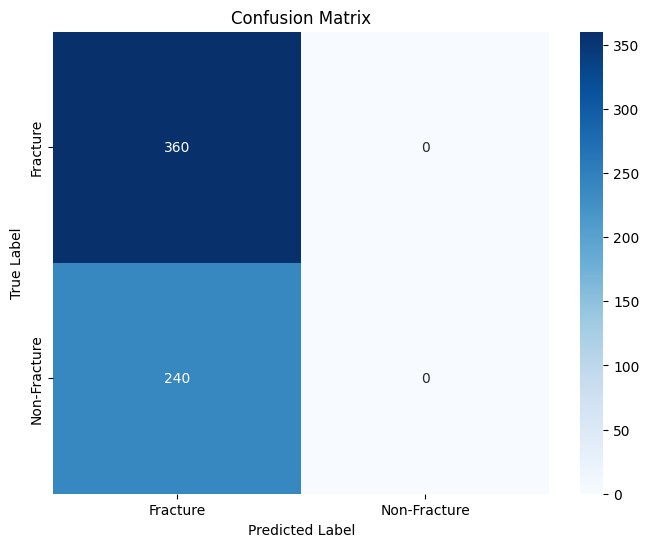

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get model predictions for the test dataset
y_pred = model.predict(Xtest)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fracture', 'Non-Fracture'], 
            yticklabels=['Fracture', 'Non-Fracture'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()